<h1 align = "center" style = "color: red"> Numerov Algorithm </h1>

---

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
import scienceplots
plt.style.use(["science", "notebook", "grid"])

The Numerov algorithm is a numerical method designed to solve second-order ordinary differential equations (ODEs) of the form:

$$ \frac{d^{2}y}{dx^{2}} = f(x, y), $$

where $f(x, y)$ is a function of $x$ and possibly of $y(x)$ as well. However, it is most efficiently used for equations where the dependence on $y$ is either linear or absent, making it particularly suitable for problems in quantum mechanics, such as solving the Schrödinger equation. The form of the ODE for which Numerov's method is especially designed is:

$$ \frac{d^{2}y}{dx^{2}} = -g(x)y(x) + s(x), $$

where $g(x)$ and $s(x)$ are known functions. This method is celebrated for its simplicity and high accuracy, being a fourth-order method, which means the error per step is of the order of $h^5$, where $h$ is the step size.

### Key Features of the Numerov Algorithm:

1. **Accuracy:** It is a fourth-order method, offering a good balance between computational efficiency and accuracy for suitable problems.

2. **Efficiency:** For problems it's well-suited to, it can achieve high accuracy with relatively few computation steps compared to some other methods.

3. **Simplicity:** The algorithm doesn't require the computation of higher-order derivatives of the function, which can simplify the implementation.

### Basic Concept:

The Numerov algorithm is based on the Taylor series expansion but incorporates a clever averaging technique to eliminate the fourth-order derivative term, thus enhancing its accuracy without significantly increasing computational complexity. The method approximates the solution by considering the values of $y$ and its second derivative at discrete points along the x-axis.

### The Algorithm (General Steps):

1. **Discretization:** Divide the range of $x$ into a grid with a uniform spacing $h$, such that $x_{i+1} = x_i + h$.

2. **Initialization:** Determine the initial conditions. For boundary value problems, this might involve knowing $y$ at two points. For initial value problems, this involves knowing $y$ and its first derivative at the initial point, though the algorithm primarily advances $y$ based on its second derivative.

3. **Iteration:** For each point $x_i$ on the grid, use the Numerov formula to calculate $y_{i+1}$, the value of $y$ at the next point, based on its values at the current and previous points ($y_i$ and $y_{i-1}$), and incorporating the functions $g(x)$ and $s(x)$.

4. **Numerov Formula:** The core of the algorithm is the formula that computes $y_{i+1}$ using a corrected average of the second derivative at three points ($x_{i-1}$, $x_i$, and $x_{i+1}$) and the known functions $g(x)$ and $s(x)$.

5. **Post-Processing:** After computing $y$ across the grid, additional processing might be necessary, depending on the problem's requirements (e.g., normalization for quantum mechanics problems).

The Numerov algorithm's simplicity, coupled with its effectiveness for a broad class of problems, makes it a valuable tool in computational physics and related fields. Its implementation can be straightforward, but care must be taken in handling boundary conditions and ensuring that the step size $h$ is chosen appropriately to balance accuracy and computational resources.

Given the specific form of the second-order ordinary differential equation (ODE):

$$ \frac{d^{2}y}{dx^{2}} = -g(x)y(x) + s(x) $$

we can adapt the Numerov algorithm accordingly. This form is especially common in quantum mechanics for solving the Schrödinger equation, where $g(x)$ is related to the potential energy function and $s(x)$ can represent a source term or be set to zero for homogeneous equations.

### Numerov Algorithm Adapted for the Specific ODE Form:

The algorithm takes advantage of the fact that for a small step size $h$, the value of $y(x)$ at a point $x_{i+1}$ can be expressed in terms of its values at $x_i$ and $x_{i-1}$, with corrections for $g(x)$ and $s(x)$.

#### Pseudocode:

1. **Initialization:**
   - Define the grid of $x$ values: $x_0, x_1, \ldots, x_N$, with a uniform step size $h$.
   - Initialize $y_0$ and $y_1$, the first two values of $y(x)$, based on initial or boundary conditions.
   - Compute $g(x)$ and $s(x)$ for each $x_i$.

2. **Numerov Integration Loop:**
   - For each $i$ from 2 to $N$:
     - Compute an intermediate value $g_i = g(x_i)$ and $s_i = s(x_i)$.
     - Calculate a correction term based on $g(x)$ and $s(x)$:
       $$
       C_i = 1 + \frac{h^2}{12}g_i
       $$
     - Use the Numerov formula to find $y_{i+1}$:
       $$
       y_{i+1} = \frac{2y_i \left(1 - \frac{5h^2}{12}g_{i}\right) - y_{i-1} \left(1 + \frac{h^2}{12}g_{i-1}\right) + h^2s_{i}}{1 + \frac{h^2}{12}g_{i+1}}
       $$
       - Note: The formula involves $g$ and $s$ at different points, adjusting for the algorithm's requirement to predict $y$ based on its surrounding points.

3. **Post-Processing (if necessary):**
   - Depending on the problem, additional steps such as normalization or error estimation may be required after the loop.

4. **Output or Visualization:**
   - The final step is to output or visualize the computed values of $y(x)$ for the entire grid of $x$ values.

This pseudocode provides a framework for implementing the Numerov algorithm for the given form of the ODE. The actual implementation might require adjustments based on specific boundary conditions, the nature of the functions $g(x)$ and $s(x)$, and the desired accuracy of the solution.

In [93]:
def numerov_algorithm(gx: Callable, sx: Callable, h: float, x0: float, xn: float, y0: float, y_prime0: float, epsilon: float = 1e-20) -> np.ndarray:
    """Solve a second order differential equation using the Numerov algorithm.
                                y'' = -g(x)y(x) + s(x)
    Args:
        g: Callable: The RHS of the differential equation. Where g(x) is the function of x.
        s: Callable: The RHS of the differential equation. Where s(x) is the function of x.
        h: float: The step size.
        x0: float: The initial x value.
        xn: float: The final x value.
        y0: float: The initial y value.
        y_prime0: float: The initial derivative of y.
        epsilon: float: A small number to avoid division by zero.
    Returns:
        np.ndarray: The solution to the differential equation.
    """
    N_points: int = int((xn - x0) / h) + 1 # Number of points
    y_values: np.ndarray = np.zeros(N_points) # Array to store the y values
    y_values[0], y_values[1] = y0, y0 + h * y_prime0 # Initial conditions

    for idx in range(1, N_points - 1):
        x_current, x_next, x_prev = x0 + idx * h, x0 + (idx + 1) * h, x0 + (idx - 1) * h # Current, next and previous x values
        try:
            gx_current, gx_next, gx_prev = gx(x_current), gx(x_next), gx(x_prev) # g(x) at the current, next and previous x values
            sx_current, sx_next, sx_prev = sx(x_current), sx(x_next), sx(x_prev) # s(x) at the current, next and previous x values
        except ZeroDivisionError:
            x_current += epsilon 
            x_next += epsilon
            x_prev += epsilon
            gx_current, gx_next, gx_prev = gx(x_current), gx(x_next), gx(x_prev)
            sx_current, sx_next, sx_prev = sx(x_current), sx(x_next), sx(x_prev)
        y_current, y_prev = y_values[idx], y_values[idx - 1] # y at the current and previous x values
        first_factor: float = 2 * (1 - (5 / 12) * h**2 * gx_current) * y_current # First factor in the numerator
        second_factor: float = (1 + (1 / 12) * h**2 * gx_prev) * y_prev # Second factor in the numerator
        third_factor: float = h**2 * (sx_next + 10 * sx_current + sx_prev) / 12 # Third factor in the numerator
        correction_factor: float = (1 + (1 / 12) * h**2 * gx_next) # Correction factor
        y_values[idx + 1] = ((first_factor - second_factor + third_factor) / (1 + (1 / 12) * h**2 * gx_next)) / correction_factor
    return y_values

### An Example: Solving the Schrödinger Equation for Hydrogen Atom
$$
V(r) = -\frac{e^2}{r}
$$

In [94]:
h, m = 1.0, 10
l, E = 1, -0.5

def V(r: np.ndarray) -> np.ndarray:
    """The potential function for the differential equation.
    Args:
        r: np.ndarray: The x values.
    Returns:
        np.ndarray: The V(x) values.
    """
    return -1 / r # The potential function for the hydrogen atom 

def gr(r: np.ndarray, l: int = l) -> np.ndarray:
    """The g(x) function for the differential equation.
    Args:
        r: np.linspace: The x values.
        l: int: The angular momentum quantum number.
    Returns:
        np.ndarray: The g(x) values.
    """
    return  -(l * (l + 1) / (r**2)) * V(r)

def sr(r : np.ndarray, E: float = E) -> np.ndarray:
    """The s(x) function for the differential equation.
    Args:
        r: np.linspace: The x values.
        E: float: The energy of the system.
    Returns:
        np.ndarray: The s(x) values.
    """
    pre_factor = 2 * m / h**2
    return pre_factor * (E - V(r))

In [99]:
r0, rn, h = 0.0001, 5, 0.0001
u_r = numerov_algorithm(gr, sr, h, r0, rn, 0.01, 0.01)

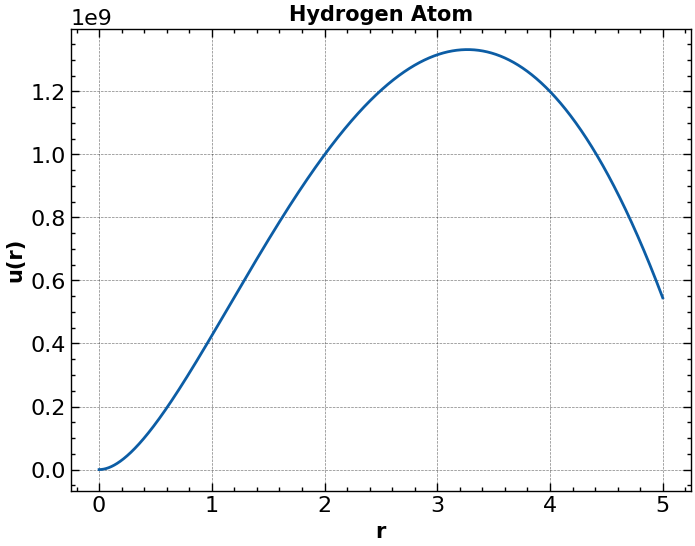

In [100]:
plt.plot(np.linspace(r0, rn, len(u_r)), u_r)
plt.xlabel('r', fontsize = 15, fontweight = 'bold')
plt.ylabel('u(r)', fontsize = 15, fontweight = 'bold')
plt.title('Hydrogen Atom', fontsize = 15, fontweight = 'bold');